In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

#plt.style.use("ultrasurfaces_plotstyle.mplstyle")

from toy_mc import generator
from importlib import reload

In [2]:
delta_msq_31 = 2.515e-3
sinsq_theta_23 = 0.565
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
default_pars = generator.OscPars(delta_msq_31, sinsq_2theta_23)

default_response = generator.Response(1., 0.05)

bin_edges = np.logspace(1., 2., 26)

In [3]:
reload(generator)

<module 'toy_mc.generator' from '/Users/trettin/Documents/ultrasurfaces/toy_mc/generator.py'>

In [4]:
gen = generator.Generator(int(1e5), default_response, default_pars)
h0 = gen.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [5]:
gen.detector_response

Response(mu=1.0, sigma=0.05)

In [6]:
h0.hist_unc

array([33.83869725, 43.21608821, 47.94658536, 46.53581866, 42.65531989,
       34.85723642, 26.83777408, 18.51382382, 12.50109655,  8.107837  ,
        6.32777148,  6.68701893,  9.17203256, 11.83692785, 14.7768683 ,
       18.12772046, 20.39756704, 23.32489795, 25.25982064, 26.85072734,
       27.96047924, 28.06707067, 29.01351913, 29.90337714, 28.75964775])

In [7]:
h0.hist

array([1562.1205801 , 2213.62410442, 2574.05391317, 2474.58569693,
       2259.15193936, 1742.86998376, 1281.80004344,  786.5287189 ,
        482.8514794 ,  306.15962781,  244.16233425,  260.54504611,
        379.15205689,  505.57245233,  663.32133851,  834.34145683,
        913.60118152, 1070.09348456, 1129.03847191, 1169.88997286,
       1175.90470307, 1106.87595238, 1124.52875187, 1140.93862766,
       1014.83899598])

In [8]:
from toy_mc.histogram import plot_histogram

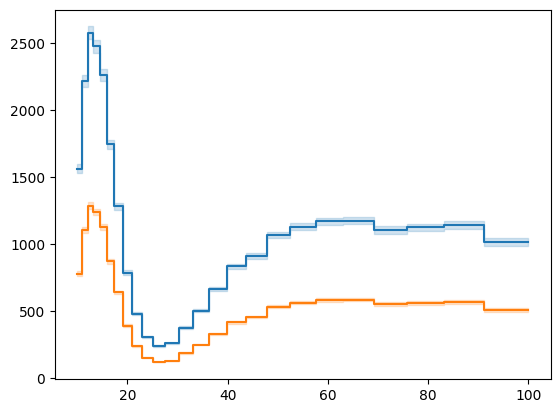

In [9]:
fig, ax = plt.subplots()
plot_histogram(h0, ax=ax)
plot_histogram(h0 / 2, ax=ax)

In [10]:
gen.events

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights
0,65.166192,-1.0,0.664435,82.715613,0.664435
1,19.114741,-1.0,0.291064,20.530871,0.291064
2,11.749420,-1.0,0.903314,10.915170,0.903314
3,6.402365,-1.0,0.995519,6.567080,0.995519
4,8.857386,-1.0,0.031434,9.307020,0.031434
...,...,...,...,...,...
99995,22.585034,-1.0,0.067778,26.869382,0.067778
99996,34.812541,-1.0,0.167987,52.077941,0.167987
99997,17.278165,-1.0,0.505553,15.016200,0.505553
99998,6.504320,-1.0,0.998995,6.826396,0.998995


In [11]:
gen_2 = generator.Generator(
    int(1e5),
    default_response,
    generator.OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta),
)
h2 = gen_2.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [12]:
gen_3 = generator.Generator(
    int(1e5), generator.Response(1.2 * default_response.mu, default_response.sigma), default_pars
)
h3 = gen_3.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


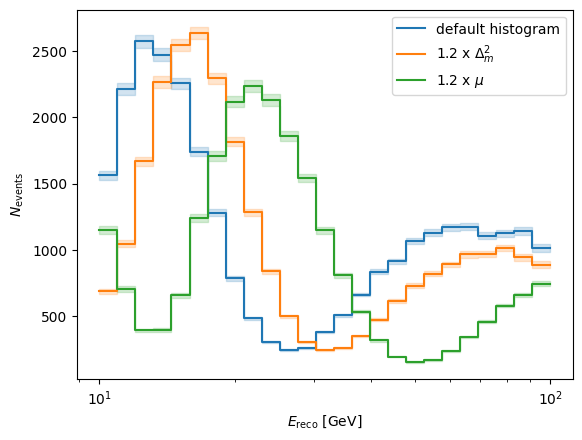

In [13]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

plot_histogram(h0, ax=ax, label=r'default histogram')

plot_histogram(h2, ax=ax, label=r'1.2 x $\Delta_m^2$ ')

plot_histogram(h3, ax=ax, label=r'1.2 x $\mu$')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ [GeV]')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

In [14]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

In [15]:
from surfaces import calculate_knn_probs as knn_probs

In [46]:
reload(generator)
gen_nominal = generator.Generator(
    int(1e5), default_response, default_pars, name="nominal"
)
# It looks like there is a breakdown point where, if the response is *too* different,
# the whole thing doesn't work anymore.
gen_sys_1 = generator.Generator(
    int(1e5),
    generator.Response(1.1 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_01",
)
gen_sys_2 = generator.Generator(
    int(1e5),
    generator.Response(0.90 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_02",
)
gen_sys_3 = generator.Generator(
    int(1e5),
    generator.Response(0.95 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_03",
)
gen_sys_4 = generator.Generator(
    int(1e5),
    generator.Response(1.05 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_04",
)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [47]:
reload(knn_probs)
df_with_probs = knn_probs.calculate_knn_probs(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=True,
    neighbors_per_class=200
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████| 10/10 [00:23<00:00,  2.36s/it]


In [48]:
df_with_probs_no_tilt_corr = knn_probs.calculate_knn_probs(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=False,
    neighbors_per_class=200
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


In [49]:
df_with_probs

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02,prob_sys_03,prob_sys_04
0,33.258493,-1.0,0.131390,26.066214,0.131390,nominal,0.165370,0.000139,0.416436,0.392175,0.025881
1,8.169298,-1.0,0.084217,7.503749,0.084217,nominal,0.301421,0.007831,0.204295,0.420951,0.065502
2,2.949453,-1.0,0.133524,2.665779,0.133524,nominal,0.118895,0.002894,0.536277,0.329453,0.012480
3,13.555529,-1.0,0.980284,14.311910,0.980284,nominal,0.397116,0.105451,0.027754,0.143620,0.326059
4,48.205168,-1.0,0.451484,52.684665,0.451484,nominal,0.349906,0.120823,0.015643,0.161445,0.352183
...,...,...,...,...,...,...,...,...,...,...,...
99995,62.165890,-1.0,0.636095,57.541611,0.636095,nominal,0.391339,0.021675,0.110619,0.337400,0.138967
99996,70.087416,-1.0,0.704628,75.866925,0.704628,nominal,0.349717,0.100512,0.029075,0.177445,0.343252
99997,13.599458,-1.0,0.977525,14.156462,0.977525,nominal,0.414537,0.090820,0.023522,0.171842,0.299278
99998,8.544012,-1.0,0.019022,9.155865,0.019022,nominal,0.341414,0.155033,0.016187,0.108574,0.378791


In [50]:
from toy_mc.histogram import Histogram

In [51]:
weighted_hist = Histogram(bin_edges)
weighted_hist.fill(
    df_with_probs["reco_energy"],
    df_with_probs["weights"]
    * df_with_probs["prob_sys_01"]
    / df_with_probs["prob_nominal"],
)

weighted_hist_no_tilt_corr = Histogram(bin_edges)
weighted_hist_no_tilt_corr.fill(
    df_with_probs_no_tilt_corr["reco_energy"],
    df_with_probs_no_tilt_corr["weights"]
    * df_with_probs_no_tilt_corr["prob_sys_01"]
    / df_with_probs_no_tilt_corr["prob_nominal"],
)

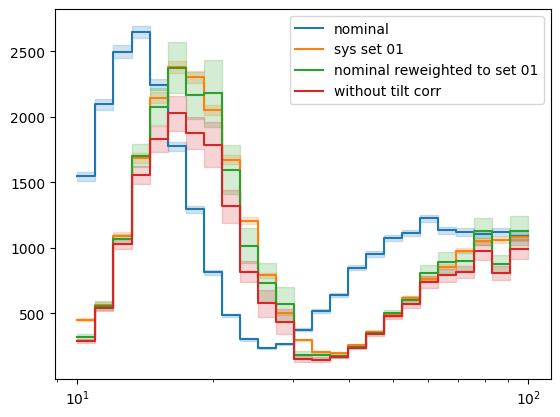

In [52]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

plot_histogram(nominal_hist, ax=ax, label="nominal")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(weighted_hist, ax=ax, label="nominal reweighted to set 01")
plot_histogram(weighted_hist_no_tilt_corr, ax=ax, label="without tilt corr")
plt.semilogx()
plt.legend()
plt.show()

In [53]:
from surfaces import calculate_grads
reload(calculate_grads)

<module 'surfaces.calculate_grads' from '/Users/trettin/Documents/ultrasurfaces/surfaces/calculate_grads.py'>

In [54]:
# get gradient names for systematic "mu"
grad_names = calculate_grads.make_gradient_names(["mu"], 2)
grad_names

['grad__mu', 'grad__mu__mu']

In [56]:
# make delta_p matrix for the systematic "mu" 
# (i.e. the detector response)
delta_p = calculate_grads.make_delta_p_from_grad_names(
    grad_names, [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4], gen_nominal
)
delta_p

array([[ 0.    ,  0.1   , -0.1   , -0.05  ,  0.05  ],
       [ 0.    ,  0.01  ,  0.01  ,  0.0025,  0.0025]])

In [57]:
# reload(calculate_grads)
df_with_grads = calculate_grads.fit_gradients(
    df_with_probs, prob_columns=["prob_nominal", "prob_sys_01", "prob_sys_02", "prob_sys_03", "prob_sys_04"], delta_p=delta_p, grad_names=grad_names
)

100%|██████████| 100000/100000 [00:20<00:00, 4856.43it/s]


In [58]:
df_with_grads

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02,prob_sys_03,prob_sys_04,grad__mu,grad__mu__mu
0,33.258493,-1.0,0.131390,26.066214,0.131390,nominal,0.165370,0.000139,0.416436,0.392175,0.025881,-27.684743,-181.164206
1,8.169298,-1.0,0.084217,7.503749,0.084217,nominal,0.301421,0.007831,0.204295,0.420951,0.065502,-17.798928,-215.075784
2,2.949453,-1.0,0.133524,2.665779,0.133524,nominal,0.118895,0.002894,0.536277,0.329453,0.012480,-29.110072,-132.377982
3,13.555529,-1.0,0.980284,14.311910,0.980284,nominal,0.397116,0.105451,0.027754,0.143620,0.326059,7.483855,-204.269853
4,48.205168,-1.0,0.451484,52.684665,0.451484,nominal,0.349906,0.120823,0.015643,0.161445,0.352183,8.718361,-198.159616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62.165890,-1.0,0.636095,57.541611,0.636095,nominal,0.391339,0.021675,0.110619,0.337400,0.138967,-8.547848,-210.658315
99996,70.087416,-1.0,0.704628,75.866925,0.704628,nominal,0.349717,0.100512,0.029075,0.177445,0.343252,6.447014,-188.713193
99997,13.599458,-1.0,0.977525,14.156462,0.977525,nominal,0.414537,0.090820,0.023522,0.171842,0.299278,6.041314,-216.048451
99998,8.544012,-1.0,0.019022,9.155865,0.019022,nominal,0.341414,0.155033,0.016187,0.108574,0.378791,12.010016,-197.554019


In [62]:
# generate a histogram by weighting the nominal events to any detector response using the gradients in the dataframe
def generate_histogram_at_response(df, nominal_response, response, bin_edges, use_systs=None, variable="reco_energy"):
    """Generate a histogram at a given detector response.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the events and gradients
    nominal_response : toy_mc.generator.Response
        Nominal detector response
    response : toy_mc.generator.Response
        Detector response to weight the events to
    bin_edges : np.ndarray
        Bin edges for the histogram
    use_systs : list of str, optional
        List of systematic names to use. If None, all systematics are used.
    variable : str, optional
        Variable to use for the histogram. Default is "reco_energy".
    """
    if use_systs is None:
        grad_names = df.columns[df.columns.str.startswith("grad__")]
    else:
        grad_names = ["grad_{}".format(syst) for syst in use_systs]
    delta_p = np.ones(len(grad_names))
    for i, grad_name in enumerate(grad_names):
        for param in grad_name.split("grad")[-1].split("__")[1:]:
            delta_p[i] *= getattr(response, param) - getattr(nominal_response, param)
    weights = df["weights"] * np.exp(np.dot(df[grad_names], delta_p))
    hist = Histogram(bin_edges)
    hist.fill(df[variable], weights)
    return hist

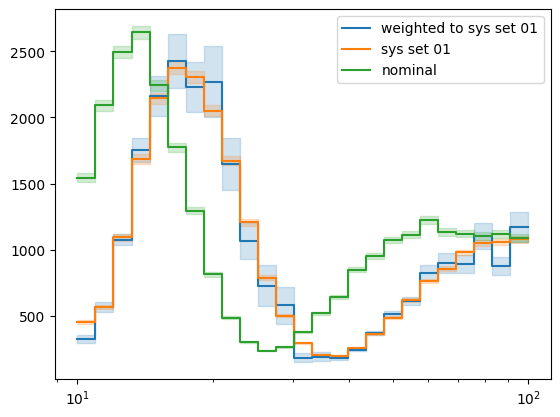

In [63]:
# generate a histogram at the response of sys set 01 using gradients

hist_at_sys_01 = generate_histogram_at_response( df_with_grads, default_response, gen_sys_1.detector_response, bin_edges)
sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

# plot the histograms
fig, ax = plt.subplots()
plot_histogram(hist_at_sys_01, ax=ax, label="weighted to sys set 01")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(nominal_hist, ax=ax, label="nominal")
plt.semilogx()
plt.legend()
plt.show()

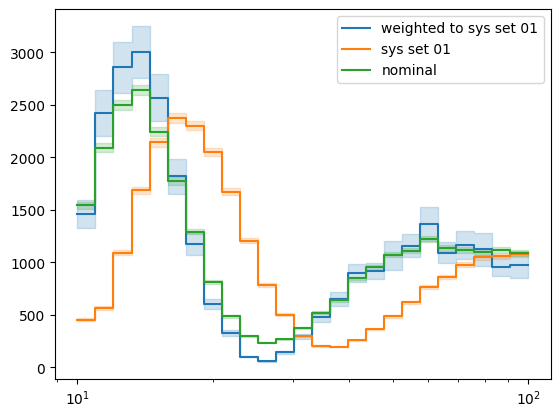

In [64]:
hist_at_sys_01 = generate_histogram_at_response(
    df_with_grads, default_response, gen_sys_1.detector_response, bin_edges, variable="true_energy"
)
sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

# plot the histograms
fig, ax = plt.subplots()
plot_histogram(hist_at_sys_01, ax=ax, label="weighted to sys set 01")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(nominal_hist, ax=ax, label="nominal")
plt.semilogx()
plt.legend()
plt.show()

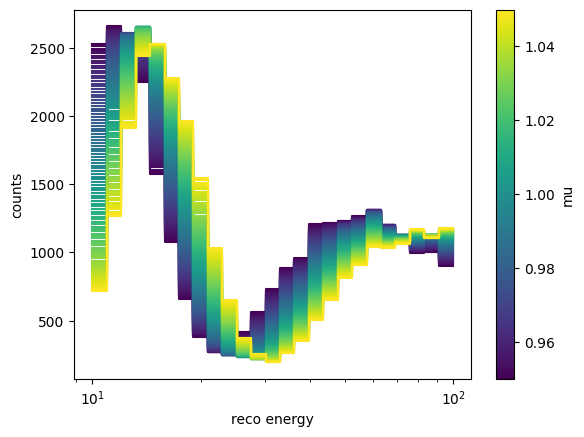

In [61]:
# sweep response parameter mu around nominal value and plot the histograms
mus = np.linspace(0.95, 1.05, 100)
hists = []
for mu in mus:
    response = generator.Response(mu * default_response.mu, default_response.sigma)
    hists.append(generate_histogram_at_response(df_with_grads, default_response, response, bin_edges))

fig, ax = plt.subplots()
# make list of colors from a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(mus)))
for hist, mu, color in zip(hists, mus, colors):
    plot_histogram(hist, ax=ax, show_errorband=False, label="mu = {}".format(mu), color=color)
# make colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=mus.min(), vmax=mus.max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("mu")
plt.xlabel("reco energy")
plt.ylabel("counts")
plt.semilogx()
plt.show()
